### IMPORT OUR DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\high_cost_patients.csv")

In [3]:
df.head(100)

,patient_id,age,sex,bmi,smoking_status,comorbidity_count,prev_year_cost,num_admissions,num_ed_visits,chronic_conditions,income,insurance_type,high_cost
0,1,67.0,Female,33.6,Yes,1,16139.78,4,0,DM,17004.0,Private,1
1,2,58.0,M,NaN,Former,2,14402.26,1,0,Asthma,22523.0,Private,1
2,3,70.0,Female,19.6,No,1,6857.25,1,3,DM,15896.0,PRIVATE,0
3,4,83.0,Female,31.4,No,5,4625.06,1,1,NaN,46071.0,Private,1
4,5,56.0,F,NaN,Yes,1,4949.19,1,1,DM,18086.0,PRIVATE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,38.0,NaN,24.9,Former,1,444.93,3,2,HTN;DM,16880.0,PRIVATE,1
96,97,64.0,Female,26.4,Yes,2,9547.84,0,2,NaN,36843.0,public,0
97,98,64.0,Female,22.1,Current,3,5842.47,1,3,HTN;DM,19100.0,Private,0
98,99,60.0,M,25.3,Current,0,7707.72,0,2,Asthma,31611.0,Private,0


### CHECK OUR DATA

In [4]:
df.isna().sum()

patient_id              0
age                    25
sex                   118
bmi                    25
smoking_status         84
comorbidity_count       0
prev_year_cost          0
num_admissions          0
num_ed_visits           0
chronic_conditions    131
income                 25
insurance_type         93
high_cost               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          500 non-null    int64  
 1   age                 475 non-null    float64
 2   sex                 382 non-null    object 
 3   bmi                 475 non-null    float64
 4   smoking_status      416 non-null    object 
 5   comorbidity_count   500 non-null    int64  
 6   prev_year_cost      500 non-null    float64
 7   num_admissions      500 non-null    int64  
 8   num_ed_visits       500 non-null    int64  
 9   chronic_conditions  369 non-null    object 
 10  income              475 non-null    float64
 11  insurance_type      407 non-null    object 
 12  high_cost           500 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 50.9+ KB


In [6]:
df.dtypes

patient_id              int64
age                   float64
sex                    object
bmi                   float64
smoking_status         object
comorbidity_count       int64
prev_year_cost        float64
num_admissions          int64
num_ed_visits           int64
chronic_conditions     object
income                float64
insurance_type         object
high_cost               int64
dtype: object

### CLEANING

In [7]:
#sex column

In [8]:
df.loc[df["sex"] == 'M', 'sex'] = 'Male'
df.loc[df["sex"] == 'F', 'sex'] = 'Female'

In [9]:
imputer_cat = SimpleImputer(strategy='most_frequent')
df['sex'] = imputer_cat.fit_transform(df[['sex']]).ravel()

In [10]:
#checking
df[(df['sex'] != 'Male') & (df['sex'] != 'Female')].shape[0]

0

In [11]:
#age colummn

In [12]:
#mean (male)
df[df["sex"] == 'Male']['age'].mean()

np.float64(60.19112627986348)

In [13]:
df.loc[(df["age"].isna()) & (df["sex"] == 'Male'), 'age'] = 60.19

In [14]:
#mean (Female)
df[df['sex'] == 'Female']['age'].mean()

np.float64(59.44505494505494)

In [15]:
df.loc[(df['age'].isna()) & (df['sex'] == 'Female'), 'age'] = 59.44

In [16]:
df['age'].isna().sum()

np.int64(0)

In [17]:
df = df[df['age'] < 105]

In [18]:
#checking
df[(df['age'] <= 10) | (df['age'] >= 105)].shape[0]

0

In [19]:
#smoking_status column

In [20]:
df.loc[df['smoking_status'].isna(), 'smoking_status'] = 'Unknown'

In [21]:
df['smoking_status'].isna().sum()

np.int64(0)

In [22]:
#checking
df[(df['smoking_status'] != 'Yes') & (df['smoking_status'] != 'No') & (df['smoking_status'] != 'Former') & (df['smoking_status'] != 'Current') & (df['smoking_status'] != 'Unknown')].shape[0]

0

In [23]:
#bmi column

In [24]:
df[df['sex'] == 'Male']['bmi'].mean()

np.float64(28.302730375426624)

In [25]:
df[df['sex'] == 'Female']['bmi'].mean()

np.float64(28.06777777777778)

In [26]:
df.loc[(df['sex'] == 'Male') & (df['bmi'].isna()), 'bmi'] = 28.3
df.loc[(df['sex'] == 'Female') & (df['bmi'].isna()), 'bmi'] = 28.1

In [27]:
df = df[df['bmi'] >= 12]

In [28]:
#checking
df[(df['bmi'] <= 12) | (df['bmi'] >= 45)].shape[0]

0

In [29]:
#chronic_conditions column

In [30]:
df['chronic_conditions'].head(100)

0         DM
1     Asthma
2         DM
3        NaN
4         DM
       ...  
95    HTN;DM
96       NaN
97    HTN;DM
98    Asthma
99    Asthma
Name: chronic_conditions, Length: 100, dtype: object

In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [32]:
df['chronic_conditions'] = df['chronic_conditions'].str.strip()

In [33]:
df['chronic_conditions'] = df['chronic_conditions'].str.replace(';', ',')

In [34]:
df.loc[df['chronic_conditions'].isna(), 'chronic_conditions'] = 'None'

In [35]:
df['chronic_conditions']

0          DM
1      Asthma
2          DM
3        None
4          DM
5         HTN
6        None
7        None
8      HTN,DM
9         HTN
10       None
11     HTN,DM
12         DM
13       COPD
14        HTN
15       None
16       None
17     Asthma
18        HTN
19     Asthma
20         DM
21       None
22        HTN
23       COPD
24       COPD
25         DM
26       COPD
27       COPD
28       COPD
29       None
30         DM
31     HTN,DM
32        HTN
33        HTN
34       None
35         DM
36        HTN
37         DM
38         DM
39        HTN
40       COPD
41       None
42     HTN,DM
43       None
44     HTN,DM
45       None
46     HTN,DM
47         DM
48       None
49     HTN,DM
50        HTN
51       COPD
52       None
53         DM
54       None
55     Asthma
56       None
57         DM
58       None
59       COPD
60       None
61         DM
62       COPD
63        HTN
64       None
65         DM
66       None
67     HTN,DM
68     Asthma
69        HTN
70     Asthma
71    

In [36]:
#checking
df[(df['chronic_conditions'] != 'Asthma') & (df['chronic_conditions'] != 'COPD') & (df['chronic_conditions'] != 'DM') & (df['chronic_conditions'] != 'HTN') & (df['chronic_conditions'] != 'None')]

,patient_id,age,sex,bmi,smoking_status,comorbidity_count,prev_year_cost,num_admissions,num_ed_visits,chronic_conditions,income,insurance_type,high_cost
8,9,53.00,Male,28.3,Yes,1,10029.00,2,0,"HTN,DM",NaN,Private,0
11,12,53.00,Male,27.7,Current,3,3673.53,0,1,"HTN,DM",-1222.0,PRIVATE,0
31,32,88.00,Female,18.0,Yes,1,7636.92,4,0,"HTN,DM",12527.0,Private,1
42,43,58.00,Male,31.2,Yes,1,9393.85,0,3,"HTN,DM",21016.0,Private,0
44,45,38.00,Male,13.2,No,4,1440.87,0,0,"HTN,DM",23769.0,Public,0
46,47,60.19,Male,31.5,Former,0,11234.19,0,1,"HTN,DM",24077.0,PRIVATE,0
49,50,34.00,Female,24.4,Current,3,1756.72,1,2,"HTN,DM",30477.0,NaN,0
67,68,60.19,Male,22.0,No,0,8381.24,1,1,"HTN,DM",44969.0,Public,0
89,90,60.19,Male,22.9,Former,3,8760.82,3,3,"HTN,DM",16735.0,Private,1
92,93,49.00,Male,30.9,Current,0,19417.32,1,2,"HTN,DM",28918.0,PRIVATE,1


In [37]:
#income column 

In [38]:
df[df['sex'] == 'Male']['income'].mean()

np.float64(24713.484536082473)

In [39]:
df[df['sex'] == 'Female']['income'].mean()

np.float64(24699.82872928177)

In [40]:
df.loc[(df['sex'] == 'Male') & (df['income'].isna()), 'income'] = 24713.4
df.loc[(df['sex'] == 'Female') & (df['income'].isna()), 'income'] = 24699.8 

In [41]:
df['income'] = df['income'].abs()

In [42]:
#chechking
df[df['income'] < 0].shape[0]

0

In [43]:
#insurance_type column

In [44]:
df['insurance_type'].head(10)

0    Private
1    Private
2    PRIVATE
3    Private
4    PRIVATE
5        NaN
6        NaN
7     public
8    Private
9    Private
Name: insurance_type, dtype: object

In [45]:
df.loc[df['insurance_type'] == 'PRIVATE', 'insurance_type'] = 'Private'
df.loc[df['insurance_type'] == 'public', 'insurance_type'] = 'Public'

In [46]:
df['insurance_type'] = imputer_cat.fit_transform(df[['insurance_type']]).ravel()

In [47]:
df['insurance_type'].isna().sum()

np.int64(0)

In [49]:
#checking
df[(df['insurance_type'] != 'Private') & (df['insurance_type'] != 'Public')].shape[0]

0

In [50]:
#create insurance_flag column
df['insurance_flag'] = df['insurance_type'].map({'Private':1, 'Public':0})

### EDA

In [51]:
df.head(20)

,patient_id,age,sex,bmi,smoking_status,comorbidity_count,prev_year_cost,num_admissions,num_ed_visits,chronic_conditions,income,insurance_type,high_cost,insurance_flag
0,1,67.0,Female,33.6,Yes,1,16139.78,4,0,DM,17004.0,Private,1,1
1,2,58.0,Male,28.3,Former,2,14402.26,1,0,Asthma,22523.0,Private,1,1
2,3,70.0,Female,19.6,No,1,6857.25,1,3,DM,15896.0,Private,0,1
3,4,83.0,Female,31.4,No,5,4625.06,1,1,None,46071.0,Private,1,1
4,5,56.0,Female,28.1,Yes,1,4949.19,1,1,DM,18086.0,Private,0,1
5,6,56.0,Female,25.1,Current,4,17498.04,1,0,HTN,31876.0,Private,1,1
6,7,84.0,Female,28.1,Former,2,9947.91,2,3,None,21765.0,Private,0,1
7,8,72.0,Male,22.8,Current,0,3340.18,0,1,None,13416.0,Public,0,0
8,9,53.0,Male,28.3,Yes,1,10029.00,2,0,"HTN,DM",24713.4,Private,0,1
9,10,68.0,Male,23.0,Former,3,5155.16,1,2,HTN,29007.0,Private,0,1


In [52]:
#correlation
df[['insurance_flag', 'high_cost', 'bmi', 'prev_year_cost', 'num_admissions', 'num_ed_visits', 'age', 'comorbidity_count', 'income']].corr()

,insurance_flag,high_cost,bmi,prev_year_cost,num_admissions,num_ed_visits,age,comorbidity_count,income
insurance_flag,1.000000,0.035907,0.028771,-0.025511,0.049612,0.011530,0.008015,0.029103,0.042391
high_cost,0.035907,1.000000,-0.019168,0.511145,0.313647,0.049821,0.059589,0.246949,-0.009222
bmi,0.028771,-0.019168,1.000000,0.046091,-0.002628,-0.052649,-0.092229,0.009453,0.039846
prev_year_cost,-0.025511,0.511145,0.046091,1.000000,0.004625,-0.015048,0.002266,-0.034004,-0.004873
num_admissions,0.049612,0.313647,-0.002628,0.004625,1.000000,0.016683,0.006132,-0.022483,-0.045726
num_ed_visits,0.011530,0.049821,-0.052649,-0.015048,0.016683,1.000000,0.127472,0.012923,-0.002312
age,0.008015,0.059589,-0.092229,0.002266,0.006132,0.127472,1.000000,0.017977,0.027412
comorbidity_count,0.029103,0.246949,0.009453,-0.034004,-0.022483,0.012923,0.017977,1.000000,0.035418
income,0.042391,-0.009222,0.039846,-0.004873,-0.045726,-0.002312,0.027412,0.035418,1.000000


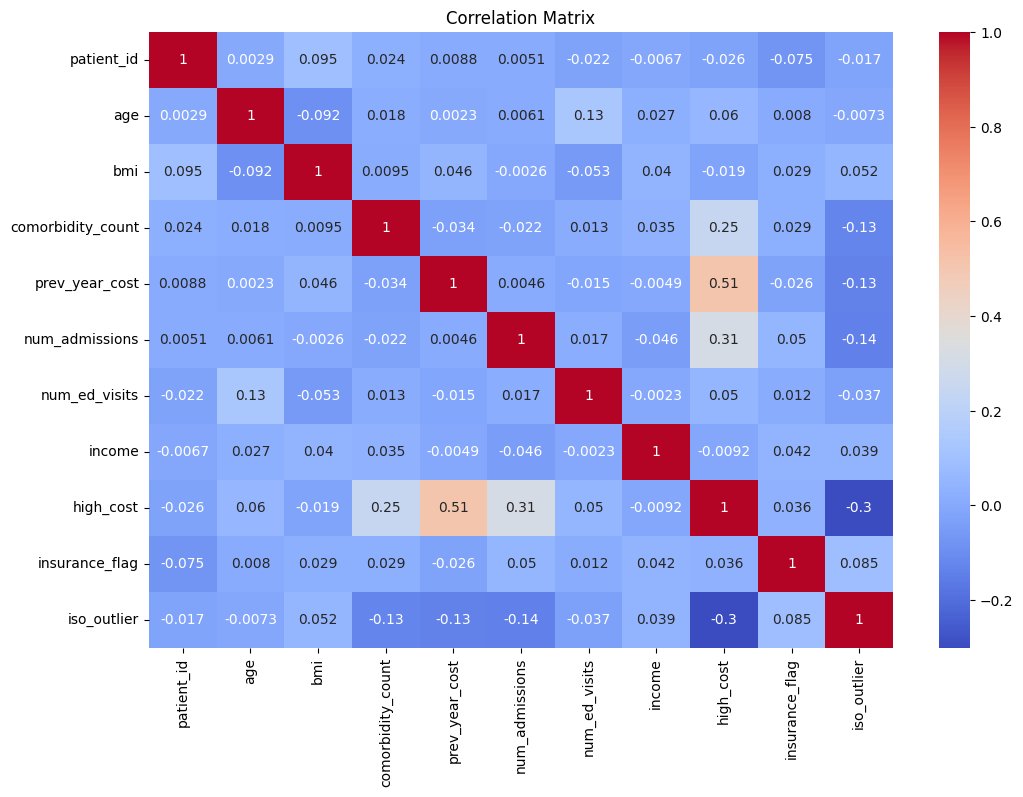

In [80]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), 
            annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [54]:
df.describe()

,patient_id,age,bmi,comorbidity_count,prev_year_cost,num_admissions,num_ed_visits,income,high_cost,insurance_flag
count,497.000000,497.000000,497.00000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,250.329980,59.735915,28.24668,2.026157,7678.669960,0.933602,1.987928,24760.606036,0.263581,0.619718
std,144.468198,13.918430,5.65597,1.417531,5445.965952,0.957577,1.337975,9231.543612,0.441019,0.485945
min,1.000000,11.000000,12.10000,0.000000,42.500000,0.000000,0.000000,284.000000,0.000000,0.000000
25%,125.000000,50.000000,24.70000,1.000000,3209.760000,0.000000,1.000000,18497.000000,0.000000,0.000000
50%,251.000000,60.190000,28.30000,2.000000,6743.980000,1.000000,2.000000,24713.400000,0.000000,1.000000
75%,375.000000,69.000000,31.80000,3.000000,11426.920000,1.000000,3.000000,30586.000000,1.000000,1.000000
max,500.000000,101.000000,43.80000,7.000000,26073.780000,4.000000,6.000000,55147.000000,1.000000,1.000000


In [55]:
#number of unique values
df[['insurance_flag', 'high_cost', 'bmi', 'prev_year_cost', 'num_admissions', 'num_ed_visits', 'age', 'comorbidity_count', 'income']].nunique

<bound method DataFrame.nunique of      insurance_flag  high_cost   bmi  prev_year_cost  num_admissions  \
0                 1          1  33.6        16139.78               4   
1                 1          1  28.3        14402.26               1   
2                 1          0  19.6         6857.25               1   
3                 1          1  31.4         4625.06               1   
4                 1          0  28.1         4949.19               1   
5                 1          1  25.1        17498.04               1   
6                 1          0  28.1         9947.91               2   
7                 0          0  22.8         3340.18               0   
8                 1          0  28.3        10029.00               2   
9                 1          0  23.0         5155.16               1   
10                0          0  29.6          565.37               2   
11                1          0  27.7         3673.53               0   
12                0          

In [56]:
#outliers
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
df['iso_outlier'] = iso.fit_predict(df[['insurance_flag', 'high_cost', 'bmi', 'prev_year_cost', 'num_admissions', 'num_ed_visits', 'age', 'comorbidity_count', 'income']])

outliers_if = df[df['iso_outlier'] == -1]
len(outliers_if)

#5% are outliers

25

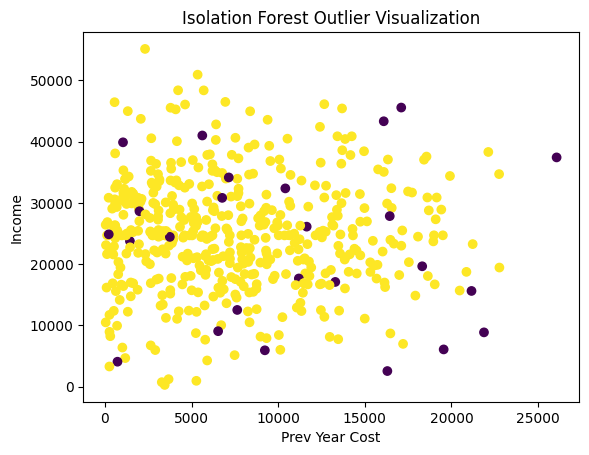

In [57]:
#plot of outliers
plt.scatter(df['prev_year_cost'], df['income'], c=df['iso_outlier'])
plt.xlabel('Prev Year Cost')
plt.ylabel('Income')
plt.title('Outlier Visualization')
plt.show()

### MACHINE LEARNING

In [58]:
#Logistic Regression Model

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [60]:
X = df[['income', 'prev_year_cost', 'insurance_flag', 'num_admissions','num_ed_visits', 'comorbidity_count']]
y = df['high_cost']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

In [82]:
#create my model
model = LogisticRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy

C:\Users\user\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.84

In [63]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

In [64]:
results = X_test.copy()
results['actual_highCost'] = y_test.values
results['predicted_hightCost'] = y_pred
results['probabilities'] = list(y_pred_prob)

results.head(90)

,income,prev_year_cost,insurance_flag,num_admissions,num_ed_visits,comorbidity_count,actual_highCost,predicted_hightCost,probabilities
189,28930.0,3975.67,0,0,0,1,0,0,"[0.9719537442662768, 0.02804625573372317]"
455,23973.0,16477.88,1,3,3,0,1,1,"[0.1804830384046675, 0.8195169615953325]"
230,20331.0,17545.92,0,4,2,1,1,1,"[0.009140385146301, 0.990859614853699]"
301,32870.0,12122.13,1,1,2,3,0,0,"[0.6468780040306681, 0.3531219959693319]"
412,22784.0,7848.02,1,0,3,1,0,0,"[0.95458584958454, 0.045414150415460035]"
417,5143.0,7484.73,0,0,0,1,0,0,"[0.6842199876124415, 0.31578001238755843]"
191,12216.0,5287.64,1,1,1,1,0,0,"[0.8452078562282056, 0.15479214377179437]"
207,21929.0,7214.35,0,2,1,3,0,1,"[0.2332456259452813, 0.7667543740547187]"
226,37061.0,18419.70,1,1,0,3,1,1,"[0.3851890982161299, 0.6148109017838701]"
433,33895.0,1165.31,0,0,2,1,0,0,"[0.9897772642020389, 0.01022273579796111]"


In [65]:
#coefficient
pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
})

,feature,coefficient
0,income,-0.000083
1,prev_year_cost,0.000230
2,insurance_flag,-0.941939
3,num_admissions,1.092755
4,num_ed_visits,0.014545
5,comorbidity_count,0.606129


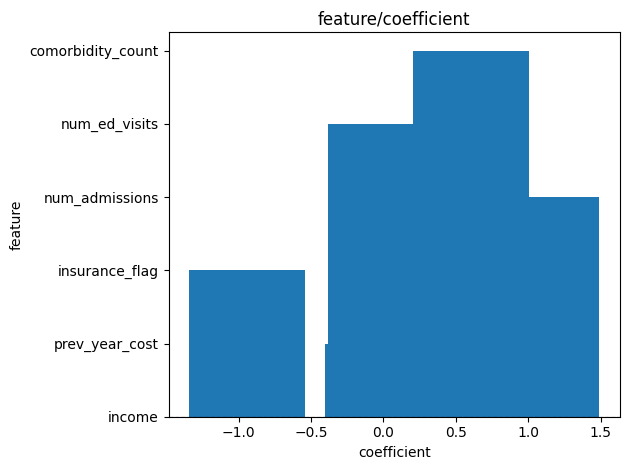

In [66]:
#coefficient plot
plt.bar(model.coef_[0], X.columns)
plt.ylabel('feature')
plt.xlabel('coefficient')
plt.title('feature/coefficient')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

In [67]:
#mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

0.16

In [68]:
#confusion matrix
print(confusion_matrix(y_test, y_pred))

[[66 10]
 [ 6 18]]


In [69]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        76
           1       0.64      0.75      0.69        24

    accuracy                           0.84       100
   macro avg       0.78      0.81      0.79       100
weighted avg       0.85      0.84      0.84       100



In [70]:
#roc auc test
print(roc_auc_score(y_test, y_pred))

0.8092105263157895


### PREDICTIONS WITH YOUR DETAILES

In [71]:
def get_valid_input(prompt, min_val, max_val, input_type=float):
    while True:
        try:
            value = input_type(input(prompt))
            if min_val <= value <= max_val:
                return value
            else:
                print(f"Error! Please enter a value between {min_val} and {max_val}.")
        except ValueError:
            print(f"Invalid input! Please enter a valid number.")

inc = get_valid_input('Give your yearly income (0-100000): ', 0, 100000, float)
prev_cost = get_valid_input('Give the medical costs of previous year (0-30000): ', 0, 30000, float)
insurance = get_valid_input('What is your insurance? (0 = Public, 1 = Private): ', 0, 1, int)
num_ad = get_valid_input('Give the number of admissions (0-4): ', 0, 4, int)
num_vis = get_valid_input('Give the number of ED visits (0-6): ', 0, 6, int)
com_count = get_valid_input('Give the number of comorbidities (0-7): ', 0, 7, int)

Give your yearly income (0-100000):  23000
Give the medical costs of previous year (0-30000):  500
What is your insurance? (0 = Public, 1 = Private):  1
Give the number of admissions (0-4):  2
Give the number of ED visits (0-6):  3
Give the number of comorbidities (0-7):  1


In [72]:
my_data = [[inc, prev_cost, insurance, num_ad, num_vis, com_count]]

In [73]:
prediction = model.predict(my_data)
probabilities = model.predict_proba(my_data)

C:\Users\user\miniconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\user\miniconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [74]:
prediction

array([0])

In [75]:
probabilities

array([[0.92874905, 0.07125095]])

### MAKE AN EXCEL FILE 

In [76]:
df.to_excel('High_Cost_Patients.xlsx', sheet_name = 'Data', index = False)